<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/programming/CP_C_loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Programming - C Loops

## Objectives:

1. Introduce concepts for looping
2. Describe common types of loops in C
3. Demonstrate common loops usage 
4. Inspect and compare compiled code for different loop types

### Utility functions

In [1]:
def generate_checksum(filename):
  add = 0
  with open(filename, "rb") as f:
      ## Read first 4 bytes of data
      while True:
          byte = f.read(4)
          if not byte:
              break
          add += int.from_bytes(byte, byteorder='little')
      return b'%02X' % (~add & 0xFFFFFFFF)

In [2]:
# check operating system
! cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [3]:
# check files in the system before running code
! ls -la

total 16
drwxr-xr-x 1 root root 4096 May 17 13:39 .
drwxr-xr-x 1 root root 4096 May 22 11:20 ..
drwxr-xr-x 4 root root 4096 May 17 13:38 .config
drwxr-xr-x 1 root root 4096 May 17 13:39 sample_data


### General concepts

1. **Initialisation** - example `int i = 0;`
2. **Test codition** - as long as condition is true do this, example `i < 5`
3. **Modifying operation** - modify variable in condition such that loop can exit at specified point, example `i++`

### "for" control structure

```
for (initialization; condition; operation;)
{
  // as long as condition is true do this
}
// out of the loop if condition is false
```

* Statements are identical to those in while loop

```
initialisation;
while (condition) {
  // body
  operation;
}
```


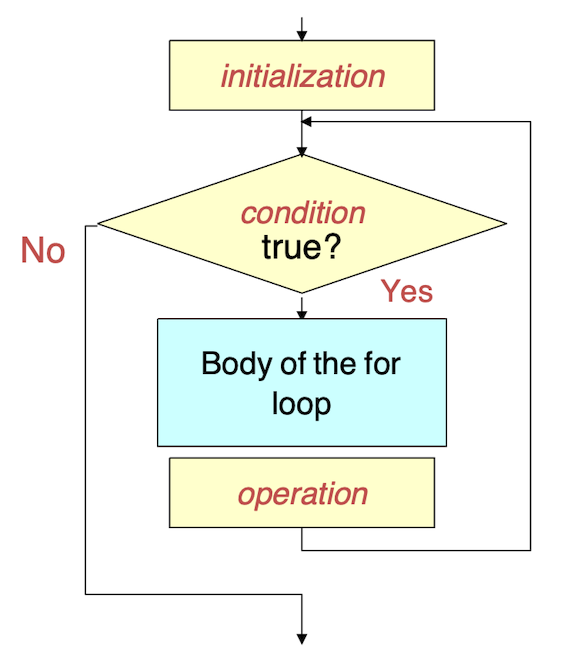

In [4]:
%%writefile loop_for.c
#include <stdio.h>
int main()
{
    for(int i = 0; i < 5; i++)
    {
        printf("Execution number = %i    |    i value = %i \n",i + 1, i);
    }
}

Writing loop_for.c


In [5]:
%%shell
gcc loop_for.c -o ./loop_for1
./loop_for1

Execution number = 1    |    i value = 0 
Execution number = 2    |    i value = 1 
Execution number = 3    |    i value = 2 
Execution number = 4    |    i value = 3 
Execution number = 5    |    i value = 4 


**Tip:** If we just want to use the loops to count, then more intuitive way is to start from `i = 1` and use the condition `i <= 5` (**adding equals sign**). 
* Result is equivalent but it works the way we would **count naturally**.
* For example if want 5 executions, we start from 1 and end on 5, if we want 9 executions we start from 1 and end with 9.

In [55]:
%%writefile loop_for.c
#include <stdio.h>
int main()
{
    for(int i = 1; i <= 5; i++)
    {
        printf("Execution number = %i    |    i value = %i \n",i, i);
    }
}

Writing loop_for.c


In [7]:
%%shell
gcc loop_for.c -o ./loop_for
./loop_for

Execution number = 1    |    i value = 1 
Execution number = 2    |    i value = 2 
Execution number = 3    |    i value = 3 
Execution number = 4    |    i value = 4 
Execution number = 5    |    i value = 5 


### "while" control

In [54]:
%%writefile loop_while.c
#include <stdio.h>
int main()
{
int i;
i = 1;
while (i <= 5)
 {
     printf("Execution number = %i    |    i value = %i \n",i, i);
     i = i +1;
 }
 return 0;
}

Writing loop_while.c


In [9]:
# Compile the C code into a binary file called output
%%shell
gcc loop_while.c -o ./loop_while 
./loop_while

Execution number = 1    |    i value = 1 
Execution number = 2    |    i value = 2 
Execution number = 3    |    i value = 3 
Execution number = 4    |    i value = 4 
Execution number = 5    |    i value = 5 


## Producing disassembly

In [10]:
!objdump --help

Usage: objdump <option(s)> <file(s)>
 Display information from object <file(s)>.
 At least one of the following switches must be given:
  -a, --archive-headers    Display archive header information
  -f, --file-headers       Display the contents of the overall file header
  -p, --private-headers    Display object format specific file header contents
  -P, --private=OPT,OPT... Display object format specific contents
  -h, --[section-]headers  Display the contents of the section headers
  -x, --all-headers        Display the contents of all headers
  -d, --disassemble        Display assembler contents of executable sections
  -D, --disassemble-all    Display assembler contents of all sections
  -S, --source             Intermix source code with disassembly
  -s, --full-contents      Display the full contents of all sections requested
  -g, --debugging          Display debug information in object file
  -e, --debugging-tags     Display debug information using ctags style
  -G, --stabs    

#### Option 1: objdump -d

* Compact output.

In [11]:
%%shell
gcc -g -c loop_for.c
objdump -d loop_for.o


loop_for.o:     file format elf64-x86-64


Disassembly of section .text:

0000000000000000 <main>:
   0:	55                   	push   %rbp
   1:	48 89 e5             	mov    %rsp,%rbp
   4:	48 83 ec 10          	sub    $0x10,%rsp
   8:	c7 45 fc 01 00 00 00 	movl   $0x1,-0x4(%rbp)
   f:	eb 1d                	jmp    2e <main+0x2e>
  11:	8b 55 fc             	mov    -0x4(%rbp),%edx
  14:	8b 45 fc             	mov    -0x4(%rbp),%eax
  17:	89 c6                	mov    %eax,%esi
  19:	48 8d 3d 00 00 00 00 	lea    0x0(%rip),%rdi        # 20 <main+0x20>
  20:	b8 00 00 00 00       	mov    $0x0,%eax
  25:	e8 00 00 00 00       	callq  2a <main+0x2a>
  2a:	83 45 fc 01          	addl   $0x1,-0x4(%rbp)
  2e:	83 7d fc 05          	cmpl   $0x5,-0x4(%rbp)
  32:	7e dd                	jle    11 <main+0x11>
  34:	b8 00 00 00 00       	mov    $0x0,%eax
  39:	c9                   	leaveq 
  3a:	c3                   	retq   


#### Option 2: objdump -drwC -M intel

If you compile with debug symbols (add -g to your GCC command line, even if you're also using -O31), you can use objdump -S to produce a more readable disassembly interleaved with C source.

```
-r shows symbol names on relocations (so you'd see puts in the call instruction below)
-R shows dynamic-linking relocations / symbol names (useful on shared libraries)
-C demangles C++ symbol names
-w is "wide" mode: it doesn't line-wrap the machine-code bytes
-Mintel: use GAS/binutils MASM-like .intel_syntax noprefix syntax instead of AT&T
-S: interleave source lines with disassembly.
```

In [12]:
%%shell
gcc -g -c loop_for.c
objdump -drwC -Mintel -S loop_for.o


loop_for.o:     file format elf64-x86-64


Disassembly of section .text:

0000000000000000 <main>:
#include <stdio.h>
int main()
{
   0:	55                   	push   rbp
   1:	48 89 e5             	mov    rbp,rsp
   4:	48 83 ec 10          	sub    rsp,0x10
    for(int i = 1; i <= 5; i++)
   8:	c7 45 fc 01 00 00 00 	mov    DWORD PTR [rbp-0x4],0x1
   f:	eb 1d                	jmp    2e <main+0x2e>
    {
        printf("Execution number = %i    |    i value = %i \n",i, i);
  11:	8b 55 fc             	mov    edx,DWORD PTR [rbp-0x4]
  14:	8b 45 fc             	mov    eax,DWORD PTR [rbp-0x4]
  17:	89 c6                	mov    esi,eax
  19:	48 8d 3d 00 00 00 00 	lea    rdi,[rip+0x0]        # 20 <main+0x20>	1c: R_X86_64_PC32	.rodata-0x4
  20:	b8 00 00 00 00       	mov    eax,0x0
  25:	e8 00 00 00 00       	call   2a <main+0x2a>	26: R_X86_64_PLT32	printf-0x4
    for(int i = 1; i <= 5; i++)
  2a:	83 45 fc 01          	add    DWORD PTR [rbp-0x4],0x1
  2e:	83 7d fc 05          	cmp    DWORD PTR [r

#### Option 3: gcc -S -fverbose-asm + cat

* add comments inside the .s file

In [13]:
# another way of getting the assembly code (using gcc)
# add comments inside the .s file
%%shell
gcc -S -fverbose-asm -O loop_for.c
cat loop_for.s

	.file	"loop_for.c"
# GNU C11 (Ubuntu 7.5.0-3ubuntu1~18.04) version 7.5.0 (x86_64-linux-gnu)
#	compiled by GNU C version 7.5.0, GMP version 6.1.2, MPFR version 4.0.1, MPC version 1.1.0, isl version isl-0.19-GMP

# GGC heuristics: --param ggc-min-expand=100 --param ggc-min-heapsize=131072
# options passed:  -imultiarch x86_64-linux-gnu loop_for.c -mtune=generic
# -march=x86-64 -O -fverbose-asm -fstack-protector-strong -Wformat
# -Wformat-security
# options enabled:  -fPIC -fPIE -faggressive-loop-optimizations
# -fasynchronous-unwind-tables -fauto-inc-dec -fbranch-count-reg
# -fchkp-check-incomplete-type -fchkp-check-read -fchkp-check-write
# -fchkp-instrument-calls -fchkp-narrow-bounds -fchkp-optimize
# -fchkp-store-bounds -fchkp-use-static-bounds
# -fchkp-use-static-const-bounds -fchkp-use-wrappers
# -fcombine-stack-adjustments -fcommon -fcompare-elim -fcprop-registers
# -fdefer-pop -fdelete-null-pointer-checks -fdwarf2-cfi-asm
# -fearly-inlining -feliminate-unused-debug-types -fforwar

We have looked at multiple ways of inspecting generated machine code. We choose the most compact one - **option 1**.

## Comparing "for" and "while" compiled code

### Comparing disassembly

In [65]:
%%shell
gcc -c loop_for.c
objdump -d loop_for.o


loop_for.o:     file format elf64-x86-64


Disassembly of section .text:

0000000000000000 <main>:
   0:	55                   	push   %rbp
   1:	48 89 e5             	mov    %rsp,%rbp
   4:	48 83 ec 10          	sub    $0x10,%rsp
   8:	c7 45 fc 01 00 00 00 	movl   $0x1,-0x4(%rbp)
   f:	eb 1d                	jmp    2e <main+0x2e>
  11:	8b 55 fc             	mov    -0x4(%rbp),%edx
  14:	8b 45 fc             	mov    -0x4(%rbp),%eax
  17:	89 c6                	mov    %eax,%esi
  19:	48 8d 3d 00 00 00 00 	lea    0x0(%rip),%rdi        # 20 <main+0x20>
  20:	b8 00 00 00 00       	mov    $0x0,%eax
  25:	e8 00 00 00 00       	callq  2a <main+0x2a>
  2a:	83 45 fc 01          	addl   $0x1,-0x4(%rbp)
  2e:	83 7d fc 05          	cmpl   $0x5,-0x4(%rbp)
  32:	7e dd                	jle    11 <main+0x11>
  34:	b8 00 00 00 00       	mov    $0x0,%eax
  39:	c9                   	leaveq 
  3a:	c3                   	retq   


In [66]:
%%shell
gcc -c loop_while.c
objdump -d loop_while.o


loop_while.o:     file format elf64-x86-64


Disassembly of section .text:

0000000000000000 <main>:
   0:	55                   	push   %rbp
   1:	48 89 e5             	mov    %rsp,%rbp
   4:	48 83 ec 10          	sub    $0x10,%rsp
   8:	c7 45 fc 01 00 00 00 	movl   $0x1,-0x4(%rbp)
   f:	eb 1d                	jmp    2e <main+0x2e>
  11:	8b 55 fc             	mov    -0x4(%rbp),%edx
  14:	8b 45 fc             	mov    -0x4(%rbp),%eax
  17:	89 c6                	mov    %eax,%esi
  19:	48 8d 3d 00 00 00 00 	lea    0x0(%rip),%rdi        # 20 <main+0x20>
  20:	b8 00 00 00 00       	mov    $0x0,%eax
  25:	e8 00 00 00 00       	callq  2a <main+0x2a>
  2a:	83 45 fc 01          	addl   $0x1,-0x4(%rbp)
  2e:	83 7d fc 05          	cmpl   $0x5,-0x4(%rbp)
  32:	7e dd                	jle    11 <main+0x11>
  34:	b8 00 00 00 00       	mov    $0x0,%eax
  39:	c9                   	leaveq 
  3a:	c3                   	retq   


### Comparing checksums

In [67]:
# change name for checksum comparison
! mv loop_for.o loop.o

In [68]:
generate_checksum("loop.o")

b'3EA37E9E'

In [69]:
# change name for checksum comparison
! mv loop_while.o loop.o

In [70]:
generate_checksum("loop.o")

b'52EC04E0'

## More sophisticated example - Generating Fibonacci numbers

In [ ]:
%%writefile fib.c
# include <stdio.h>

int main(void) {
    int x, y, z;

    x = 0;
    y = 1;
    do {
        printf("%d\n", x);
        z = x + y;
        x = y;
        y = z;
    }
    while (x < 255);
    }

Writing fib.c


In [ ]:
%%shell
gcc fib.c -o ./fib
./fib

0
1
1
2
3
5
8
13
21
34
55
89
144
233


In [ ]:
%%shell
gcc -g -c fib.c
objdump -d fib.o


fib.o:     file format elf64-x86-64


Disassembly of section .text:

0000000000000000 <main>:
   0:	55                   	push   %rbp
   1:	48 89 e5             	mov    %rsp,%rbp
   4:	48 83 ec 10          	sub    $0x10,%rsp
   8:	c7 45 f4 00 00 00 00 	movl   $0x0,-0xc(%rbp)
   f:	c7 45 f8 01 00 00 00 	movl   $0x1,-0x8(%rbp)
  16:	8b 45 f4             	mov    -0xc(%rbp),%eax
  19:	89 c6                	mov    %eax,%esi
  1b:	48 8d 3d 00 00 00 00 	lea    0x0(%rip),%rdi        # 22 <main+0x22>
  22:	b8 00 00 00 00       	mov    $0x0,%eax
  27:	e8 00 00 00 00       	callq  2c <main+0x2c>
  2c:	8b 55 f4             	mov    -0xc(%rbp),%edx
  2f:	8b 45 f8             	mov    -0x8(%rbp),%eax
  32:	01 d0                	add    %edx,%eax
  34:	89 45 fc             	mov    %eax,-0x4(%rbp)
  37:	8b 45 f8             	mov    -0x8(%rbp),%eax
  3a:	89 45 f4             	mov    %eax,-0xc(%rbp)
  3d:	8b 45 fc             	mov    -0x4(%rbp),%eax
  40:	89 45 f8             	mov    %eax,-0x8(%rbp)
  43:

In [ ]:
# check all generated files
!ls -la

total 116
drwxr-xr-x 1 root root 4096 May 21 14:44 .
drwxr-xr-x 1 root root 4096 May 21 14:40 ..
drwxr-xr-x 4 root root 4096 May 17 13:38 .config
-rwxr-xr-x 1 root root 8304 May 21 14:44 fib
-rw-r--r-- 1 root root  195 May 21 14:44 fib.c
-rw-r--r-- 1 root root 5912 May 21 14:44 fib.o
-rwxr-xr-x 1 root root 8304 May 21 14:42 loop_for
-rwxr-xr-x 1 root root 8304 May 21 14:42 loop_for1
-rw-r--r-- 1 root root  147 May 21 14:42 loop_for.c
-rw-r--r-- 1 root root 5960 May 21 14:44 loop_for.o
-rw-r--r-- 1 root root 4019 May 21 14:43 loop_for.s
-rwxr-xr-x 1 root root 8304 May 21 14:42 loop_while
-rw-r--r-- 1 root root  161 May 21 14:42 loop_while.c
-rw-r--r-- 1 root root 5896 May 21 14:44 loop_while.o
-rwxr-xr-x 1 root root 8304 May 21 14:42 output
drwxr-xr-x 1 root root 4096 May 17 13:39 sample_data


## Summary

1. There are many ways to generate disassembly from C code.
1. Most compact output is generated using is `gcc -g -c` with `objdump -d`.
1. The compiled machine code (instructions) for simple code implemented using "for" and "while" loops look the same. 
1. Respective generated binary file checksums look different. Why is this the case?

## Appendix

### Option 4: full output using objdump --disassemble-all 

* Display assembler contents of all sections
* output is very large, I think it includes all linked libraries and system utils
* there is main section which I think corresponds to the main program

In [ ]:
! objdump --disassemble-all loop_for


loop_for:     file format elf64-x86-64


Disassembly of section .interp:

0000000000000238 <.interp>:
 238:	2f                   	(bad)  
 239:	6c                   	insb   (%dx),%es:(%rdi)
 23a:	69 62 36 34 2f 6c 64 	imul   $0x646c2f34,0x36(%rdx),%esp
 241:	2d 6c 69 6e 75       	sub    $0x756e696c,%eax
 246:	78 2d                	js     275 <_init-0x27b>
 248:	78 38                	js     282 <_init-0x26e>
 24a:	36 2d 36 34 2e 73    	ss sub $0x732e3436,%eax
 250:	6f                   	outsl  %ds:(%rsi),(%dx)
 251:	2e 32 00             	xor    %cs:(%rax),%al

Disassembly of section .note.ABI-tag:

0000000000000254 <.note.ABI-tag>:
 254:	04 00                	add    $0x0,%al
 256:	00 00                	add    %al,(%rax)
 258:	10 00                	adc    %al,(%rax)
 25a:	00 00                	add    %al,(%rax)
 25c:	01 00                	add    %eax,(%rax)
 25e:	00 00                	add    %al,(%rax)
 260:	47                   	rex.RXB
 261:	4e 55                	rex.WRX push %rbp
 26

## References

1. [Ben Eater - Comparing C to machine language](https://www.youtube.com/watch?v=yOyaJXpAYZQ)
2. https://stackoverflow.com/questions/1289881/using-gcc-to-produce-readable-assembly
3. https://stackoverflow.com/questions/51666455/compute-the-checksum-for-a-binary-file-in-python
4. [What Is a Checksum (and Why Should You Care)?](https://www.howtogeek.com/363735/what-is-a-checksum-and-why-should-you-care/)
5. https://stackoverflow.com/questions/22769246/how-to-disassemble-one-single-function-using-objdump
6. [Programming and Debugging
Assembly under Linux](https://www.cs.mcgill.ca/~cs573/fall2004/classnotes/Assem_Linux.pdf)
7. https://stackoverflow.com/questions/137038/how-do-you-get-assembler-output-from-c-c-source-in-gcc
8. [Compiler explorer](https://godbolt.org/)
